In [1]:
## Introduction

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 11.5 MB/s eta 0:00:00


Importing Data

In [4]:
hmeq = pd.read_csv('hmeq.csv', delimiter = ",")
hmeq

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


Changing Nan to 0.

In [5]:
hmeq.fillna(0, inplace=True)
hmeqnum = hmeq[['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']]
hmeqnum

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,0.000000
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,0.000000
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,0.000000
3,1,1500,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


Correlation Matrix

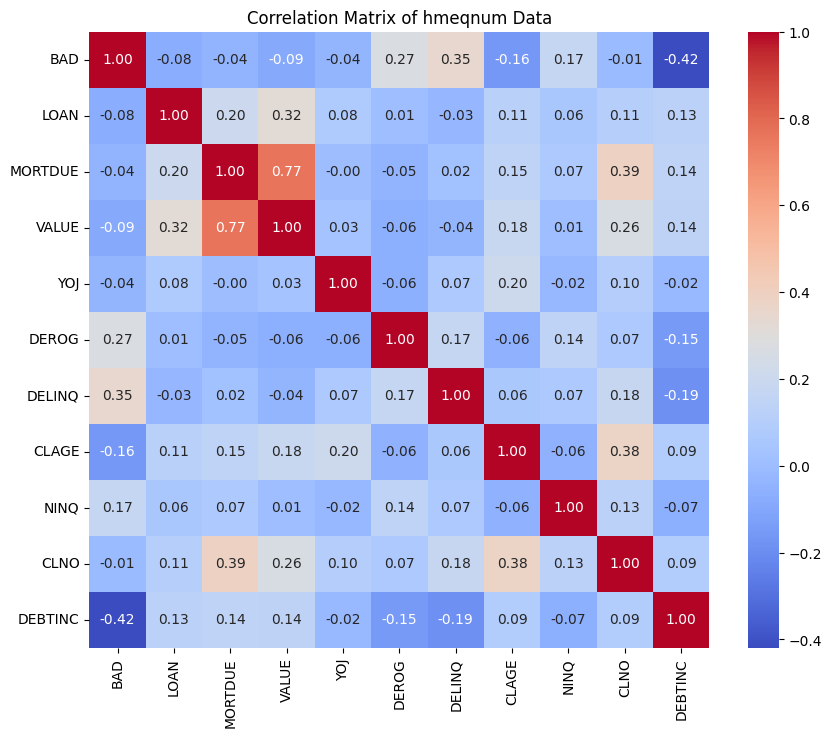

In [6]:
correlation_matrix = hmeqnum.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of hmeqnum Data')

plt.show()


OLS

In [7]:
hmeqnum = sm.add_constant(hmeqnum)
y = hmeqnum['BAD']
X = hmeqnum.drop('BAD', axis=1)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    BAD   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     267.6
Date:                Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:37:41   Log-Likelihood:                -1883.3
No. Observations:                5960   AIC:                             3789.
Df Residuals:                    5949   BIC:                             3862.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4502      0.014     31.112      0.0

Visualizing Outliers

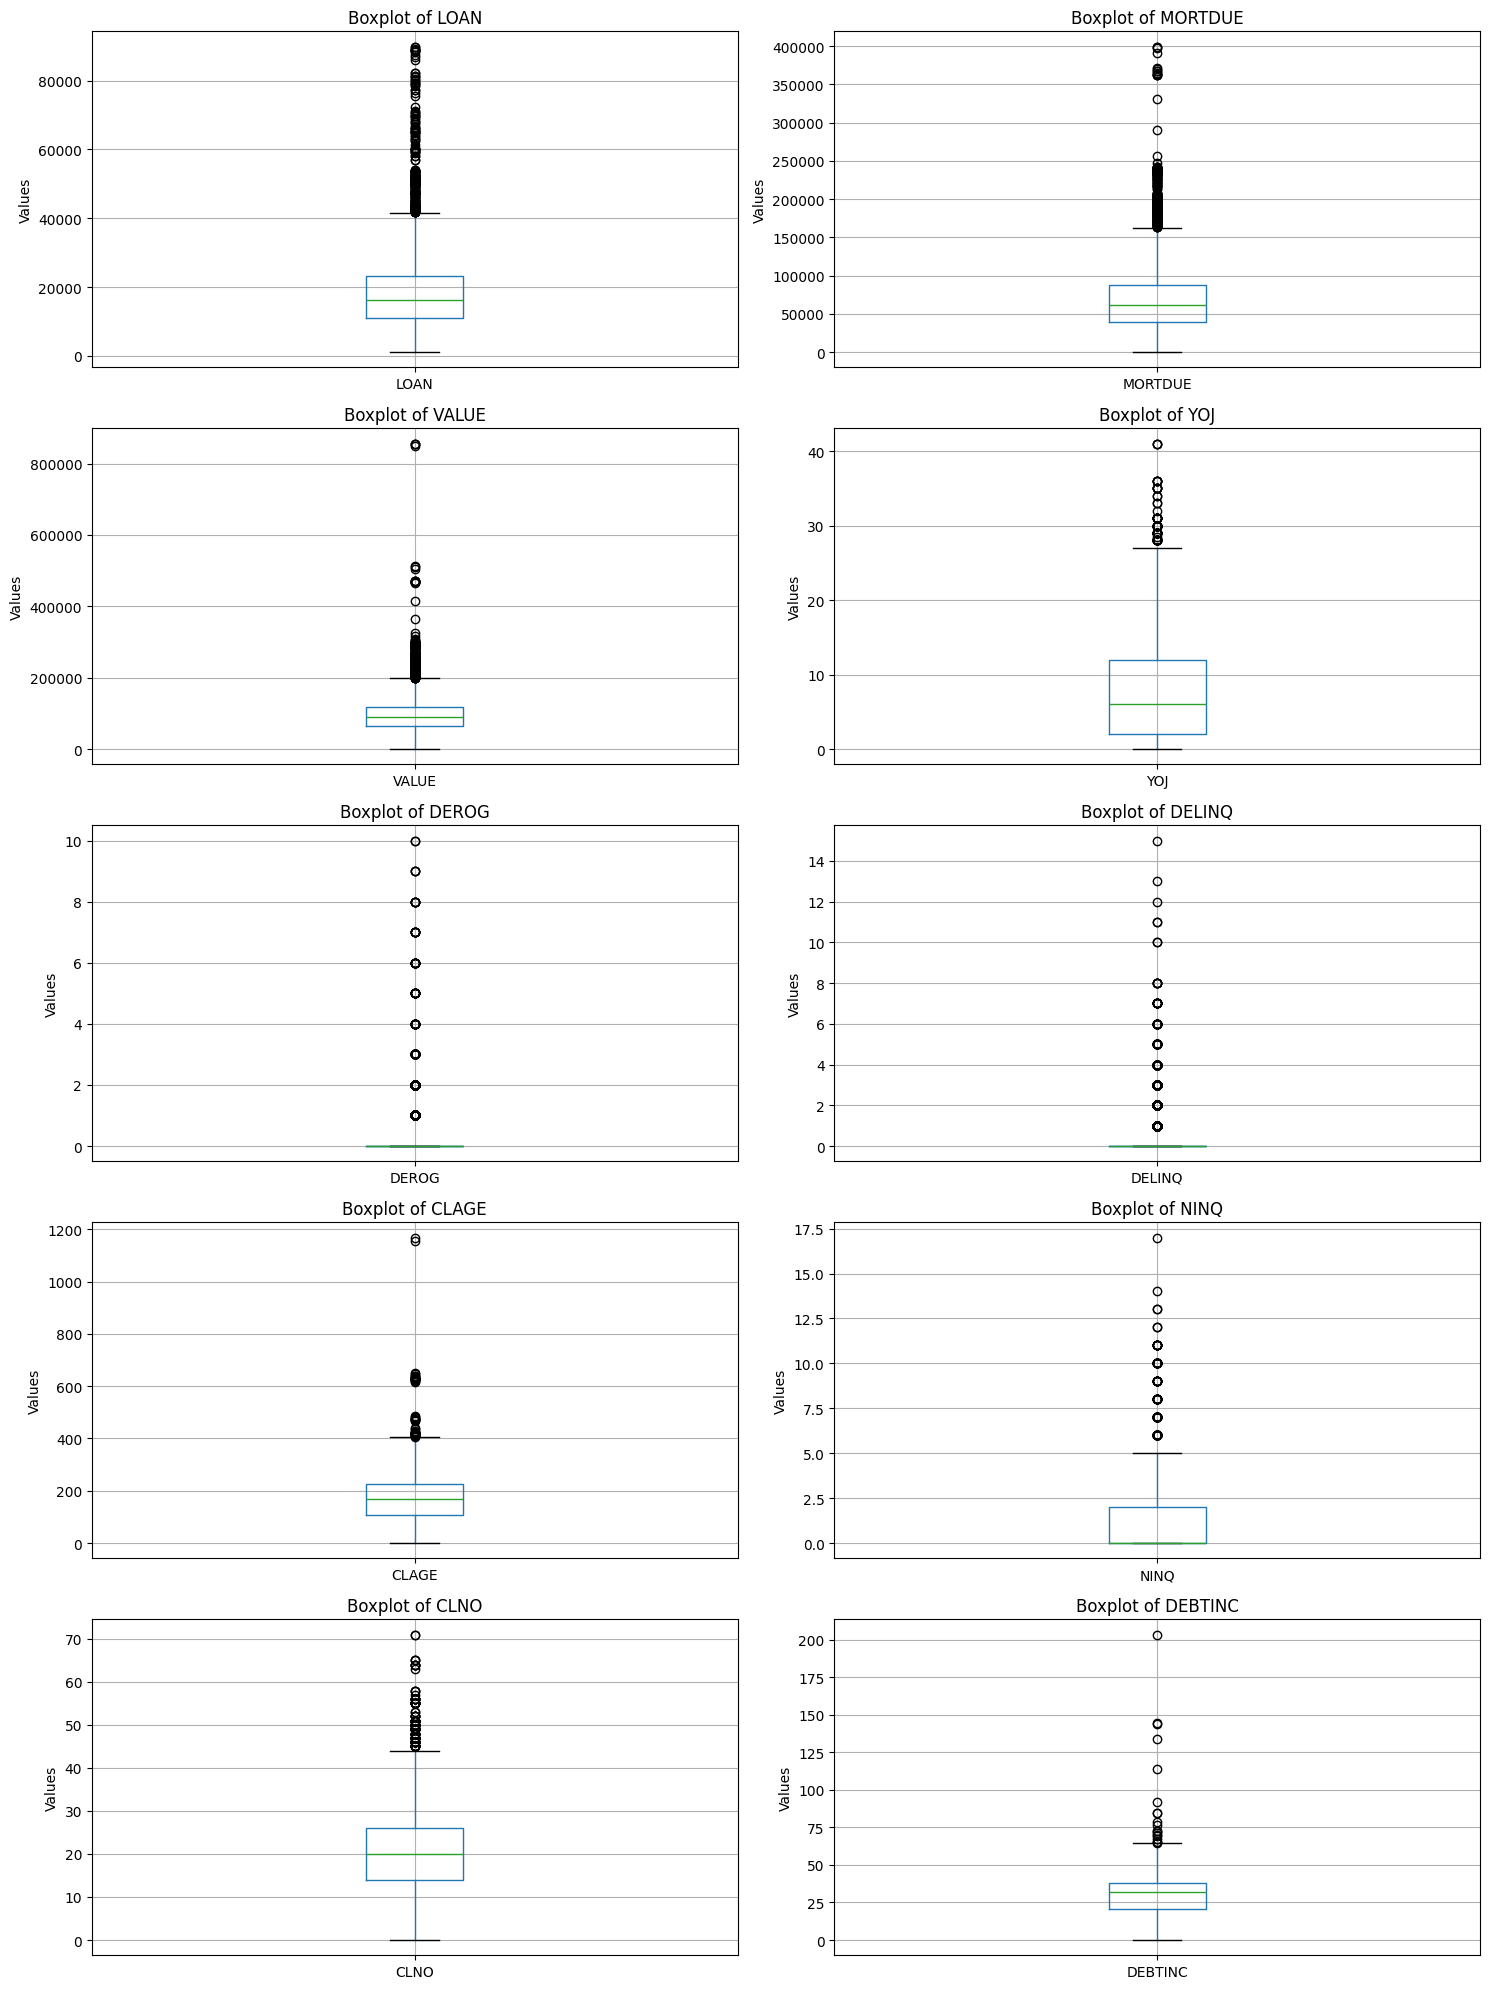

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

axes = axes.flatten()

hmeqnum.boxplot('LOAN', ax=axes[0])
axes[0].set_title('Boxplot of LOAN')
axes[0].set_ylabel('Values')

hmeqnum.boxplot('MORTDUE', ax=axes[1])
axes[1].set_title('Boxplot of MORTDUE')
axes[1].set_ylabel('Values')

hmeqnum.boxplot('VALUE', ax=axes[2])
axes[2].set_title('Boxplot of VALUE')
axes[2].set_ylabel('Values')

hmeqnum.boxplot('YOJ', ax=axes[3])
axes[3].set_title('Boxplot of YOJ')
axes[3].set_ylabel('Values')

hmeqnum.boxplot('DEROG', ax=axes[4])
axes[4].set_title('Boxplot of DEROG')
axes[4].set_ylabel('Values')

hmeqnum.boxplot('DELINQ', ax=axes[5])
axes[5].set_title('Boxplot of DELINQ')
axes[5].set_ylabel('Values')

hmeqnum.boxplot('CLAGE', ax=axes[6])
axes[6].set_title('Boxplot of CLAGE')
axes[6].set_ylabel('Values')

hmeqnum.boxplot('NINQ', ax=axes[7])
axes[7].set_title('Boxplot of NINQ')
axes[7].set_ylabel('Values')

hmeqnum.boxplot('CLNO', ax=axes[8])
axes[8].set_title('Boxplot of CLNO')
axes[8].set_ylabel('Values')

hmeqnum.boxplot('DEBTINC', ax=axes[9])
axes[9].set_title('Boxplot of DEBTINC')
axes[9].set_ylabel('Values')

plt.tight_layout()
plt.show()


Removing Outliers

In [9]:
import pandas as pd

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

columns_to_clean = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

hmeqnum_cleaned = hmeqnum.copy()

for column in columns_to_clean:
    hmeqnum_cleaned = remove_outliers(hmeqnum_cleaned, column)

OLS without outliers

In [10]:
y_cleaned = hmeqnum_cleaned['BAD']
X_cleaned = hmeqnum_cleaned.drop('BAD', axis=1)

X_cleaned = sm.add_constant(X_cleaned)

model_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()

print(model_cleaned.summary())

                            OLS Regression Results                            
Dep. Variable:                    BAD   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     13.96
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           4.60e-20
Time:                        20:37:46   Log-Likelihood:                 433.50
No. Observations:                2746   AIC:                            -849.0
Df Residuals:                    2737   BIC:                            -795.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0286      0.022      1.288      0.1

Logistic Regression

Logistic Regression with all features

In [11]:
y = hmeqnum['BAD']
X = hmeqnum.drop('BAD', axis=1)
 
X = sm.add_constant(X)
 
logit_model = sm.Logit(y, X)
 
logit_result = logit_model.fit()
 
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.347780
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 5960
Model:                          Logit   Df Residuals:                     5949
Method:                           MLE   Df Model:                           10
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:                  0.3040
Time:                        20:37:47   Log-Likelihood:                -2072.8
converged:                       True   LL-Null:                       -2978.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1762      0.120      1.470      0.141      -0.059       0.411
LOAN        -5.93e-06   4.07e

Checking Class Imbalance

In [12]:
num_zeros = (y == 0).sum()  
num_ones = (y == 1).sum()  

print("Number of instances where bad == 0:", num_zeros)
print("Number of instances where bad == 1:", num_ones)

Number of instances where bad == 0: 4771
Number of instances where bad == 1: 1189


Installing Imbalanced-Learn to correct for class imbalance

In [13]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Testing Logistic Regression with all features

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       927
           1       0.55      0.67      0.60       265

    accuracy                           0.80      1192
   macro avg       0.72      0.76      0.74      1192
weighted avg       0.82      0.80      0.81      1192

Confusion Matrix:
[[782 145]
 [ 88 177]]


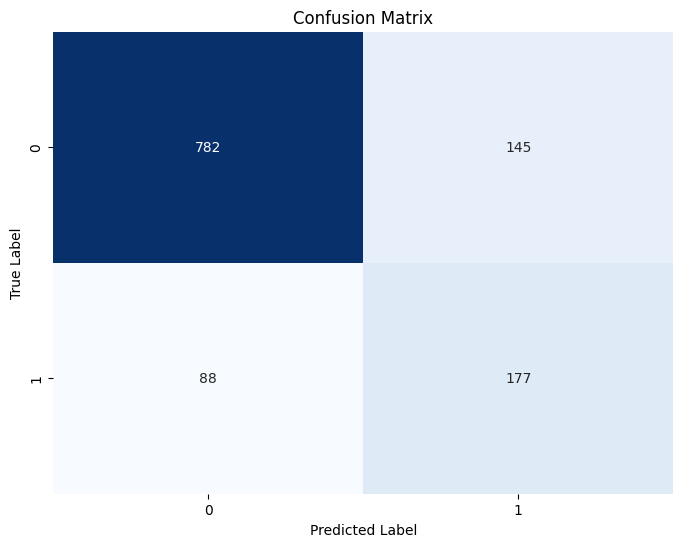

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)  

logit_model = LogisticRegression()
logit_model.fit(X_train_resampled, y_train_resampled)

y_pred = logit_model.predict(X_test)

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Running Logistic Model with statistically relevant features.

In [15]:
X_new = X.drop(['MORTDUE', 'VALUE', 'YOJ', 'NINQ'], axis=1)
 
logit_model_adjusted = sm.Logit(y, X_new)
logit_result_adjusted = logit_model_adjusted.fit()
 
print(logit_result_adjusted.summary())

Optimization terminated successfully.
         Current function value: 0.353517
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 5960
Model:                          Logit   Df Residuals:                     5953
Method:                           MLE   Df Model:                            6
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:                  0.2925
Time:                        20:37:52   Log-Likelihood:                -2107.0
converged:                       True   LL-Null:                       -2978.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2895      0.108      2.669      0.008       0.077       0.502
LOAN       -4.277e-06   3.78e

Testing Logistic Model with statistically significant features

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       927
           1       0.53      0.75      0.62       265

    accuracy                           0.80      1192
   macro avg       0.73      0.78      0.74      1192
weighted avg       0.83      0.80      0.81      1192

Confusion Matrix:
[[754 173]
 [ 67 198]]


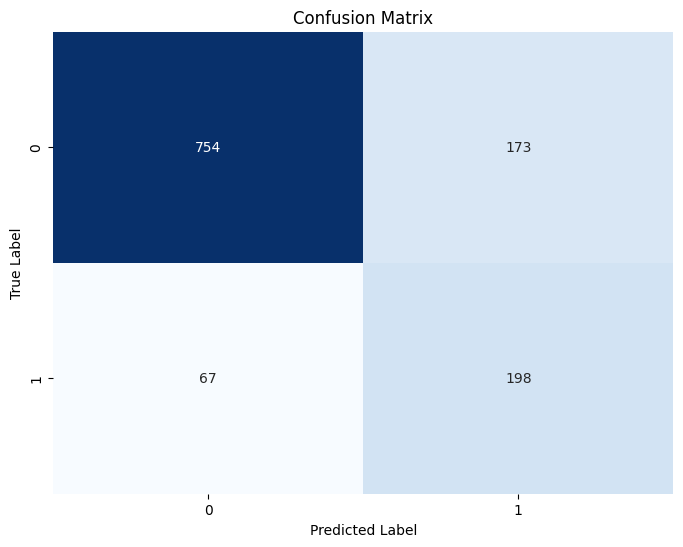

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

logit_model = LogisticRegression(max_iter=1000, random_state=37)
logit_model.fit(X_train_resampled, y_train_resampled)

y_pred = logit_model.predict(X_test)

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

SVM Classifiers

In [17]:
##SVM
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)
 
param_grid = {'C': [ 1, 10, 100 , 1000, 10000],
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['rbf']}
 
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')

Results

Best Parameters: {'C': 10000, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       927
           1       0.72      0.66      0.69       265

    accuracy                           0.87      1192
   macro avg       0.81      0.79      0.80      1192
weighted avg       0.86      0.87      0.86      1192

Confusion Matrix:
[[859  68]
 [ 91 174]]


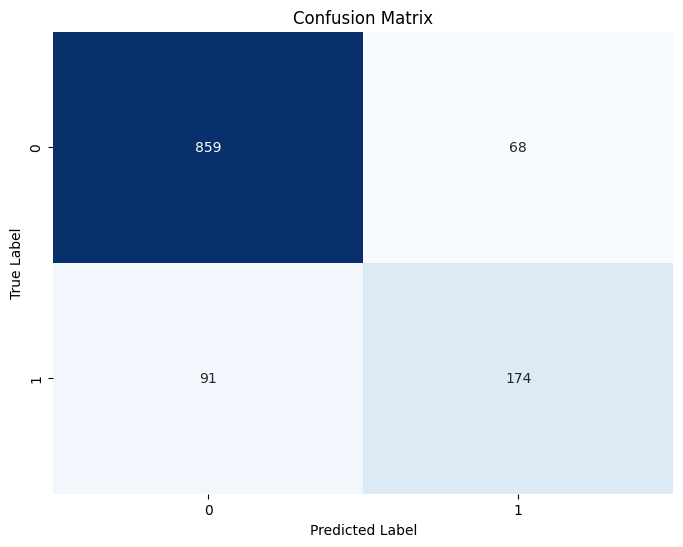

In [19]:
##SVM
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)
 
param_grid = {'C': [ 1, 10, 100 , 1000, 10000],
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['rbf']}
 
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
 
grid_search.fit(X_train_scaled, y_train_resampled)
 
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
 
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
 
print(classification_report(y_test, y_pred))
 
conf_matrix = confusion_matrix(y_test, y_pred)
 
print("Confusion Matrix:")
print(conf_matrix)
 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()